In [10]:
import pandas as pd

# 데이터 로드
file_path = 'C:\\Users\\Admin\\Documents\\GitHub\\sg_2cha\\jh\\data5\\E-Commerce Churn Data.csv'  # 파일 경로를 지정하세요
data = pd.read_csv(file_path)

# 데이터 구조 확인
print("데이터셋 구조:")
print(data.info())

# 데이터 샘플 확인
print("\n데이터 샘플:")
print(data.head())

# 데이터의 크기 확인
print("\n데이터 크기 (행, 열):", data.shape)


데이터셋 구조:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfA

In [11]:
# CityTier를 ordinal 범주형으로 변환
data['CityTier'] = data['CityTier'].astype('category')
print("\nCityTier 데이터 타입 변환 후:")
print(data['CityTier'].dtype)


CityTier 데이터 타입 변환 후:
category


In [12]:
# 결측치 개수와 비율 확인
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100

print("\n결측치 개수 및 비율:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent}))


결측치 개수 및 비율:
                             Missing Values  Percentage
CustomerID                                0    0.000000
Churn                                     0    0.000000
Tenure                                  264    4.689165
PreferredLoginDevice                      0    0.000000
CityTier                                  0    0.000000
WarehouseToHome                         251    4.458259
PreferredPaymentMode                      0    0.000000
Gender                                    0    0.000000
HourSpendOnApp                          255    4.529307
NumberOfDeviceRegistered                  0    0.000000
PreferedOrderCat                          0    0.000000
SatisfactionScore                         0    0.000000
MaritalStatus                             0    0.000000
NumberOfAddress                           0    0.000000
Complain                                  0    0.000000
OrderAmountHikeFromlastYear             265    4.706927
CouponUsed                        

1. 단계 요약: 데이터 구조와 결측치 확인 결과
2. **데이터 구조**
3. 행(row): 5630개
4. 열(column): 20개
5. 데이터는 범주형 변수(예: PreferredLoginDevice, Gender)와 수치형 변수(예: Tenure, SatisfactionScore)가 혼합되어 있습니다.
6. 일부 열에서 결측치가 발견되었습니다.
7. **결측치 개수 및 비율**
8. Tenure: 4.69%
9. WarehouseToHome: 4.46%
10. HourSpendOnApp: 4.53%
11. OrderAmountHikeFromlastYear: 4.70%
12. CouponUsed: 4.55%
13. OrderCount: 4.58%
14. DaySinceLastOrder: 5.45%

#### **이유**:
- 결측치 비율이 높다면 단순 대체가 데이터의 신뢰성을 크게 저하시킬 수 있습니다.
- 예:
- **5% 미만**: 평균, 중앙값, 최빈값으로 대체 가능.
- **5~30%**: 대체 가능하지만, 대체 방식에 신중해야 함(예: 회귀 기반 대체).
- **30% 이상**: 열 자체를 제거하거나, 분석 목표에 따라 다른 방식을 고려.

---

### **2. 변수의 데이터 분포**
#### **확인 방법**:
- 결측치가 있는 변수의 분포를 시각화합니다.
```python
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['Tenure', 'OrderAmountHikeFromlastYear']:
  sns.histplot(data[var].dropna(), kde=True)
  plt.title(f'Distribution of {var}')
  plt.show()



#### **이유**:
- 변수 간 상관관계가 높다면, 회귀 기반 대체나 다른 변수의 값을 참고하여 결측치를 예측할 수 있습니다.
- 예: `OrderAmountHikeFromlastYear`가 `OrderCount`와 상관관계가 높다면, 회귀 모델을 사용해 결측치를 예측.

---

### **4. 결측치 발생 원인 파악**
#### **확인 방법**:
- 결측치가 의도적(예: 특정 고객 그룹에서만 데이터가 수집되지 않은 경우)인지 확인합니다.
- `Churn`이나 `PreferredLoginDevice` 같은 변수와 결측치의 관계를 확인합니다.
```python
for var in ['Tenure', 'HourSpendOnApp']:
  print(data.groupby('Churn')[var].apply(lambda x: x.isnull().mean()))


In [13]:
# 중복 데이터 확인
duplicate_rows = data.duplicated().sum()
print("\n중복 데이터 개수:", duplicate_rows)



중복 데이터 개수: 0


컬럼이름 변경

In [14]:
# 컬럼 이름 변경 매핑
column_mapping = {
    "CustomerID": "고객 ID",
    "Churn": "이탈 여부",
    "Tenure": "가입 기간",
    "PreferredLoginDevice": "접속 기기",
    "CityTier": "도시 등급",
    "WarehouseToHome": "배송거리",
    "PreferredPaymentMode": "결제 방식",
    "Gender": "성별",
    "HourSpendOnApp": "앱 사용 시간",
    "NumberOfDeviceRegistered": "기기 수",
    "PreferedOrderCat": "주문 카테고리",
    "SatisfactionScore": "만족도",
    "MaritalStatus": "결혼 여부",
    "NumberOfAddress": "주소 수",
    "Complain": "불만족 여부",
    "OrderAmountHikeFromlastYear": "주문 증가율",
    "CouponUsed": "쿠폰 수",
    "OrderCount": "주문 횟수",
    "DaySinceLastOrder": "경과일",
    "CashbackAmount": "캐시백 금액"
}

# 데이터프레임 컬럼 이름 변경
data.rename(columns=column_mapping, inplace=True)

# 변경된 컬럼 이름 확인
print("변경된 컬럼 이름:")
print(data.columns)


변경된 컬럼 이름:
Index(['고객 ID', '이탈 여부', '가입 기간', '접속 기기', '도시 등급', '배송거리', '결제 방식', '성별',
       '앱 사용 시간', '기기 수', '주문 카테고리', '만족도', '결혼 여부', '주소 수', '불만족 여부',
       '주문 증가율', '쿠폰 수', '주문 횟수', '경과일', '캐시백 금액'],
      dtype='object')


In [15]:
data.describe()

,고객 ID,이탈 여부,가입 기간,배송거리,앱 사용 시간,기기 수,만족도,주소 수,불만족 여부,주문 증가율,쿠폰 수,주문 횟수,경과일,캐시백 금액
count,5630.000000,5630.000000,5366.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


- 데이터 분포 및 특성
1. 이탈 고객 비율:
    - 전체 고객 중 약 16.8%가 이탈. 클래스 불균형 가능성 존재.
2. 가입 기간(Tenure): 
    - 가입 기간이 짧은 고객이 많음(25%가 1개월 이하).
    - 초기 고객 유지가 중요한 문제로 보임.
3. 도시 등급 및 거리:
    - 평균적으로 1등급 도시(대도시)에 거주하는 고객이 많으며, 물류센터에서 집까지(배송거리) 거리는 평균 15km.
4. 만족도 및 주문 관련 데이터:
    - 만족도가 중간 수준이며, 대부분의 고객이 적은 주문 수와 쿠폰 사용을 보임.
    - 전년도 대비 주문 금액 증가율이 높은 고객이 일부 존재.

In [16]:
data


,고객 ID,이탈 여부,가입 기간,접속 기기,도시 등급,배송거리,결제 방식,성별,앱 사용 시간,기기 수,주문 카테고리,만족도,결혼 여부,주소 수,불만족 여부,주문 증가율,쿠폰 수,주문 횟수,경과일,캐시백 금액
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


이탈 여부 분포 (%):
이탈 여부
0    83.161634
1    16.838366
Name: proportion, dtype: float64


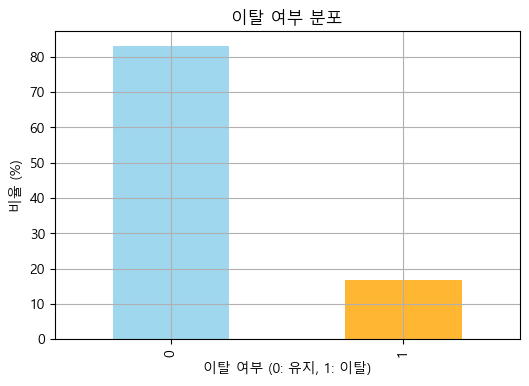

In [17]:
import matplotlib.pyplot as plt
# 맑은고딕 폰트 설정
plt.rc('font', family='Malgun Gothic')

# Churn 변수 분포 확인
churn_counts = data['이탈 여부'].value_counts(normalize=True) * 100
print("이탈 여부 분포 (%):")
print(churn_counts)

# 시각화

plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['skyblue', 'orange'], alpha=0.8)
plt.title("이탈 여부 분포")
plt.xlabel("이탈 여부 (0: 유지, 1: 이탈)")
plt.ylabel("비율 (%)")
plt.grid(True)



plt.show()


고객 이탈 (`Churn`) 변수의 불균형 상태를 보여줍니다. **약 16.8%의 고객이 이탈**하고, **83.1%의 고객이 유지**되었습니다.

---

### **분석 및 전처리 필요 사항**

1. **데이터 불균형 문제**
   - 이탈 고객과 유지 고객 간 비율 차이가 큽니다.
   - 학습 데이터가 불균형할 경우, 모델이 다수 클래스(유지 고객)에 편향될 가능성이 있습니다.

   **해결 방법**:
   - **샘플링**:
     - 소수 클래스(이탈 고객)를 증강하는 **Oversampling (예: SMOTE)**.
     - 다수 클래스(유지 고객)를 감소시키는 **Undersampling**.
   - **클래스 가중치 조정**:
     - 모델 학습 시 소수 클래스에 높은 가중치를 부여하여 균형을 맞춤.


In [18]:
# 범주형 변수의 고유값 확인
# 범주형 변수들이 예상한 값 범위 내에 있는지 확인합니다. 예를 들어, Gender, PreferredPaymentMode 등에서 이상한 값이나 입력 오류가 있는지 점검
categorical_columns = ['접속 기기', '결제 방식', '성별', '주문 카테고리', '결혼 여부']
for col in categorical_columns:
    print(f"{col}의 고유값:", data[col].unique())

접속 기기의 고유값: ['Mobile Phone' 'Phone' 'Computer']
결제 방식의 고유값: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
성별의 고유값: ['Female' 'Male']
주문 카테고리의 고유값: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
결혼 여부의 고유값: ['Single' 'Divorced' 'Married']


현재 데이터프레임의 열 이름:
Index(['고객 ID', '이탈 여부', '가입 기간', '접속 기기', '도시 등급', '배송거리', '결제 방식', '성별',
       '앱 사용 시간', '기기 수', '주문 카테고리', '만족도', '결혼 여부', '주소 수', '불만족 여부',
       '주문 증가율', '쿠폰 수', '주문 횟수', '경과일', '캐시백 금액'],
      dtype='object')


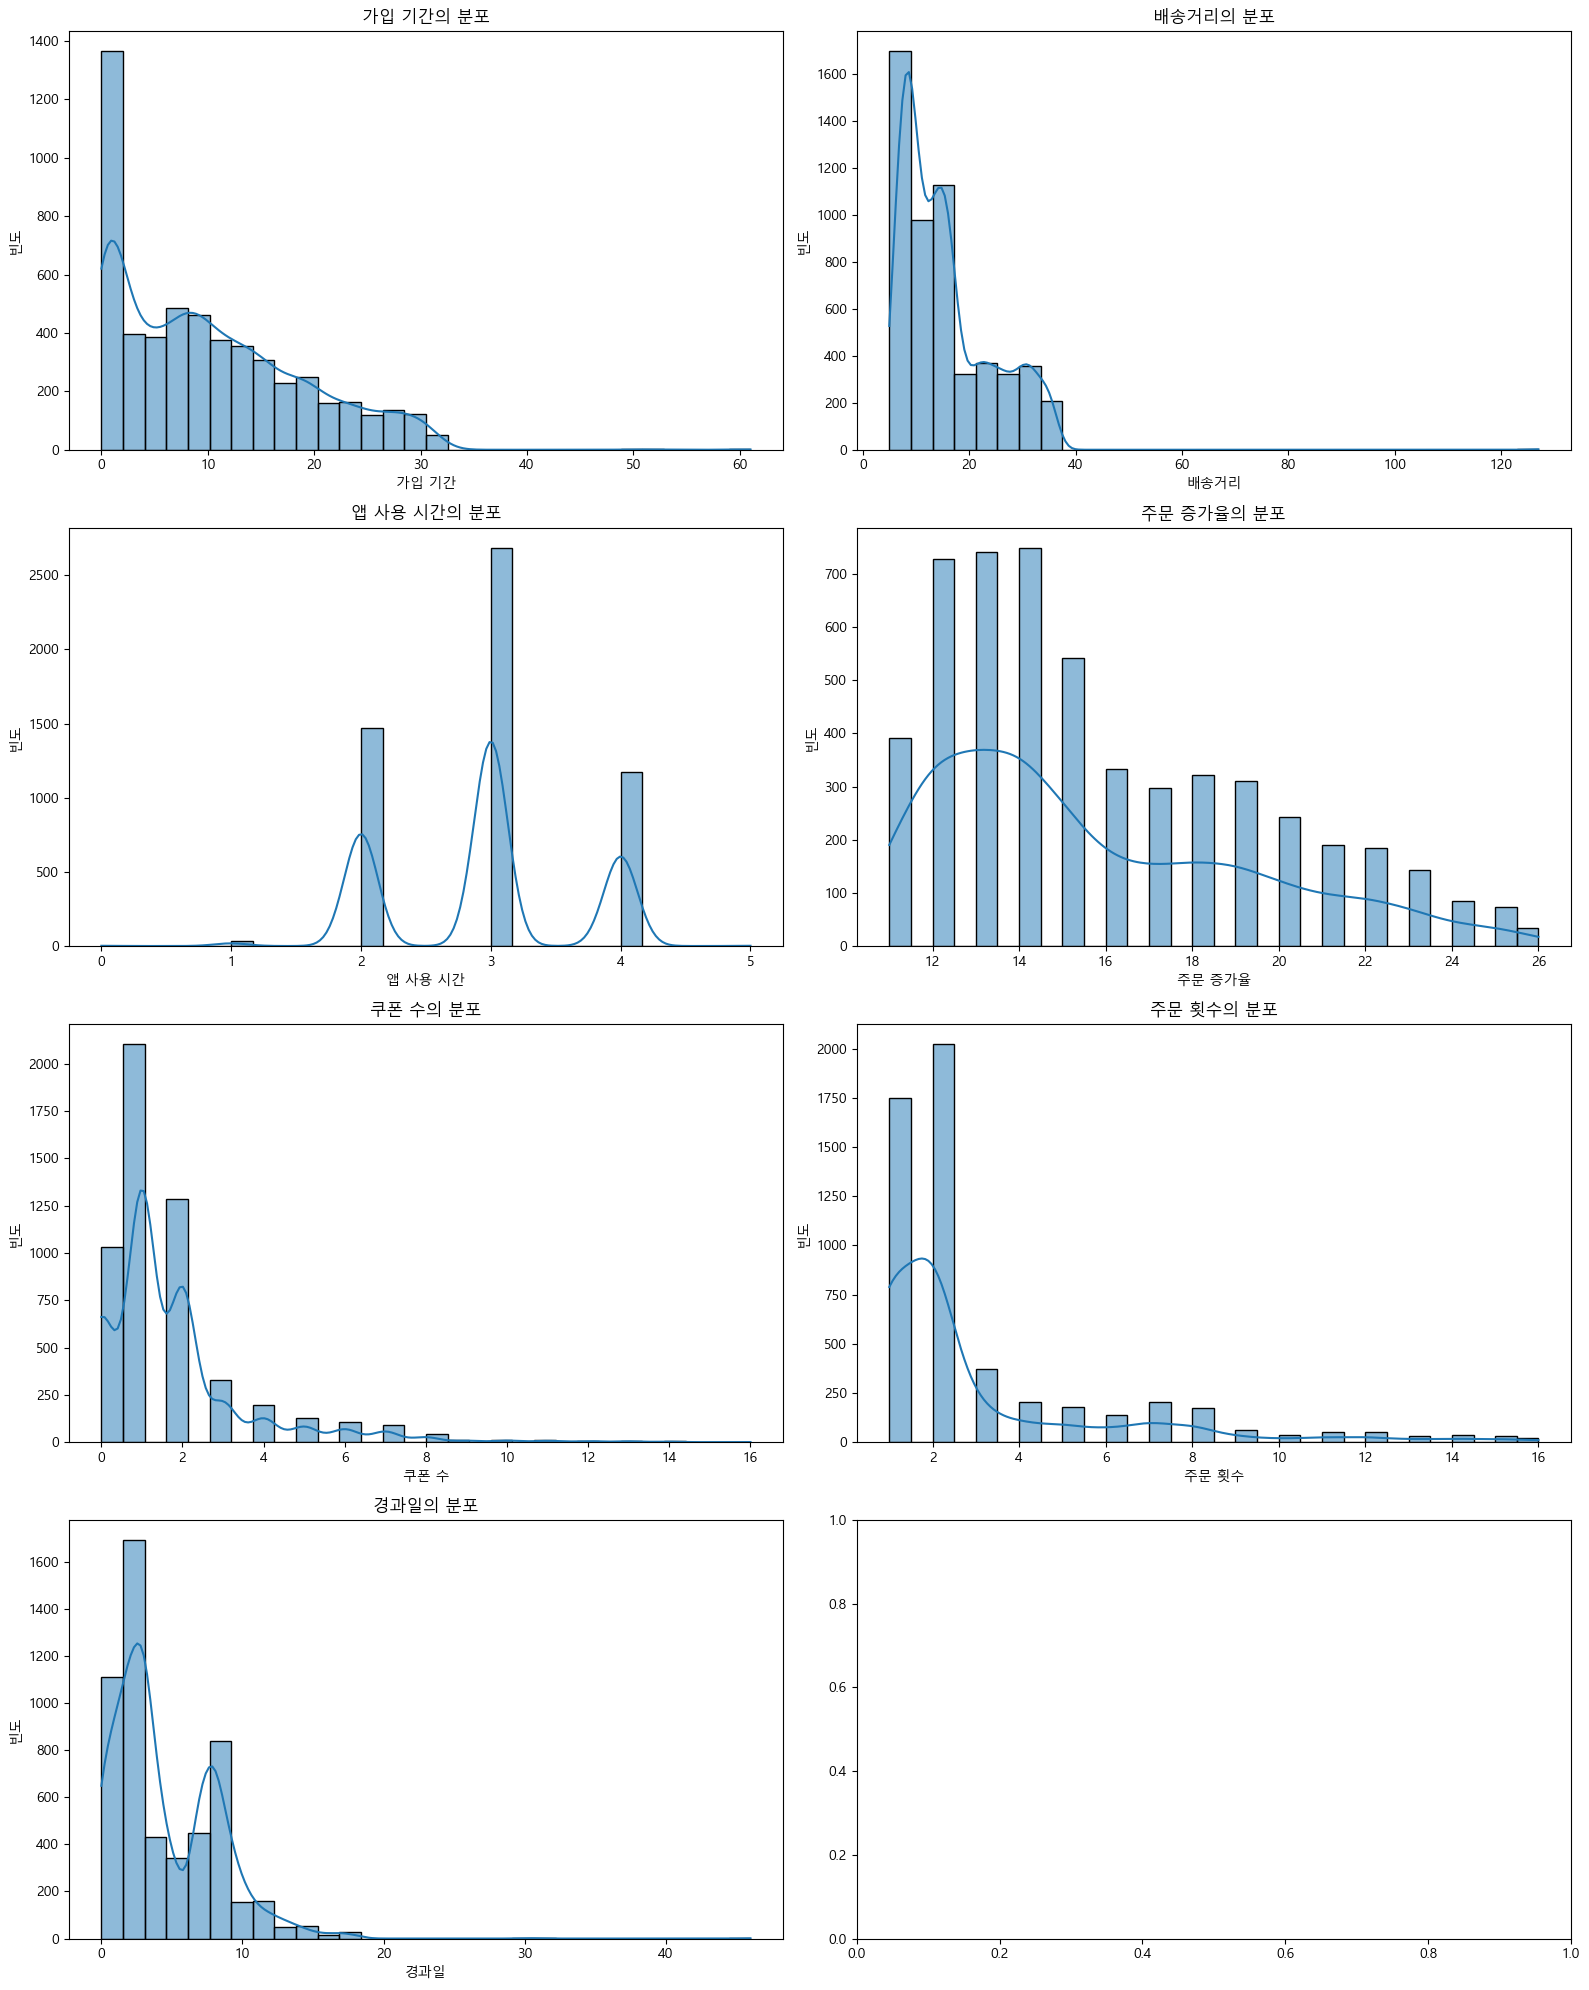

가입 기간의 분포: 
- 대부분의 고객은 **가입 기간이 짧음**(0~10개월).
- 가입 기간이 길어질수록 고객 수는 점진적으로 감소.
- 일부 고객은 장기적으로 유지(40개월 이상)..

배송거리: 
- **0~10km 거리**에 가장 많은 고객이 분포.
- 꼬리가 긴 분포를 보여 일부 고객은 100km 이상의 먼 거리에 위치.

앱 사용 시간의 분포: 
- **3시간대에 피크**를 보이는 다중봉형 분포.
-   일부 고객은 앱 사용 시간이 1시간 미만으로 매우 적음.

주문 증가율의 분포: 
- **15%~20% 증가율**을 보이는 고객이 가장 많음.
- 꼬리가 긴 분포로, 일부 고객은 25% 이상의 높은 증가율을 기록.

쿠폰 수의 분포: 
- 대부분의 고객은 **0~2개**의 쿠폰을 사용.
- 일부 고객은 **10개 이상**의 쿠폰을 사용하여 높은 활용도를 보임.

주문 횟수의 분포: 
- 대다수 고객의 주문 횟수는 **1~5회**에 집중.
- 꼬리가 긴 분포로, 일부 고객은 **10회 이상** 주문.

경과일의 분포: 
- 최근 주문 후 **0~10일**이 지난 고객이 대부분.
- 일부 고객은 **20일 이상** 경과.

요약: 
- 대부분의 변수는 **비대칭 분포**를 보이며, 꼬리가 긴 형태가 특징적.
- 고객 특성은 **짧은 활동 주기**(가입 기간, 앱 사용 시간, 경과일)에 집중.
- 극단값이 존재하므로 **중앙값 기반 결측치 처리**나 **로그 변환** 등 적절한 처리가 필요.


In [20]:
import seaborn as sns 

# 데이터프레임의 열 이름 확인
print("현재 데이터프레임의 열 이름:")
print(data.columns)

# 시각화 코드 수정
numerical_vars = ['가입 기간', '배송거리', '앱 사용 시간', 
                  '주문 증가율', '쿠폰 수', 
                  '주문 횟수', '경과일']  # '배송 거리'를 '창고→집 거리'로 수정

# 윈도우 기본폰트로 설정하여 폰트오류 해결
plt.rc('font', family='Malgun Gothic')

# 2열로 시각화
fig, axs = plt.subplots(len(numerical_vars) // 2 + (1 if len(numerical_vars) % 2 != 0 else 0), 2, figsize=(16, 20))

for i, var in enumerate(numerical_vars):
    row = i // 2
    col = i % 2
    sns.histplot(data[var].dropna(), kde=True, bins=30, ax=axs[row, col])
    axs[row, col].set_title(f'{var}의 분포')
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('빈도')

plt.tight_layout()
# 그래프 표시
plt.tight_layout()
plt.show()

# 분석 결과 요약
analysis_summary = {
    "가입 기간의 분포": '\n'"- 대부분의 고객은 **가입 기간이 짧음**(0~10개월).\n- 가입 기간이 길어질수록 고객 수는 점진적으로 감소.\n- 일부 고객은 장기적으로 유지(40개월 이상)..",
    '\n'"배송거리": '\n'"- **0~10km 거리**에 가장 많은 고객이 분포.\n- 꼬리가 긴 분포를 보여 일부 고객은 100km 이상의 먼 거리에 위치.",
    '\n'"앱 사용 시간의 분포":'\n'"- **3시간대에 피크**를 보이는 다중봉형 분포.\n-   일부 고객은 앱 사용 시간이 1시간 미만으로 매우 적음.",
    '\n'"주문 증가율의 분포": '\n'"- **15%~20% 증가율**을 보이는 고객이 가장 많음.\n- 꼬리가 긴 분포로, 일부 고객은 25% 이상의 높은 증가율을 기록.",
    '\n'"쿠폰 수의 분포": '\n'"- 대부분의 고객은 **0~2개**의 쿠폰을 사용.\n- 일부 고객은 **10개 이상**의 쿠폰을 사용하여 높은 활용도를 보임.",
    '\n'"주문 횟수의 분포": '\n'"- 대다수 고객의 주문 횟수는 **1~5회**에 집중.\n- 꼬리가 긴 분포로, 일부 고객은 **10회 이상** 주문.",
    '\n'"경과일의 분포": '\n'"- 최근 주문 후 **0~10일**이 지난 고객이 대부분.\n- 일부 고객은 **20일 이상** 경과.",
    '\n'"요약":'\n' "- 대부분의 변수는 **비대칭 분포**를 보이며, 꼬리가 긴 형태가 특징적.\n- 고객 특성은 **짧은 활동 주기**(가입 기간, 앱 사용 시간, 경과일)에 집중.\n- 극단값이 존재하므로 **중앙값 기반 결측치 처리**나 **로그 변환** 등 적절한 처리가 필요."
}

# 분석 결과 출력
for key, value in analysis_summary.items():
    print(f"{key}: {value}")




1단계: 변수별 분포 분석

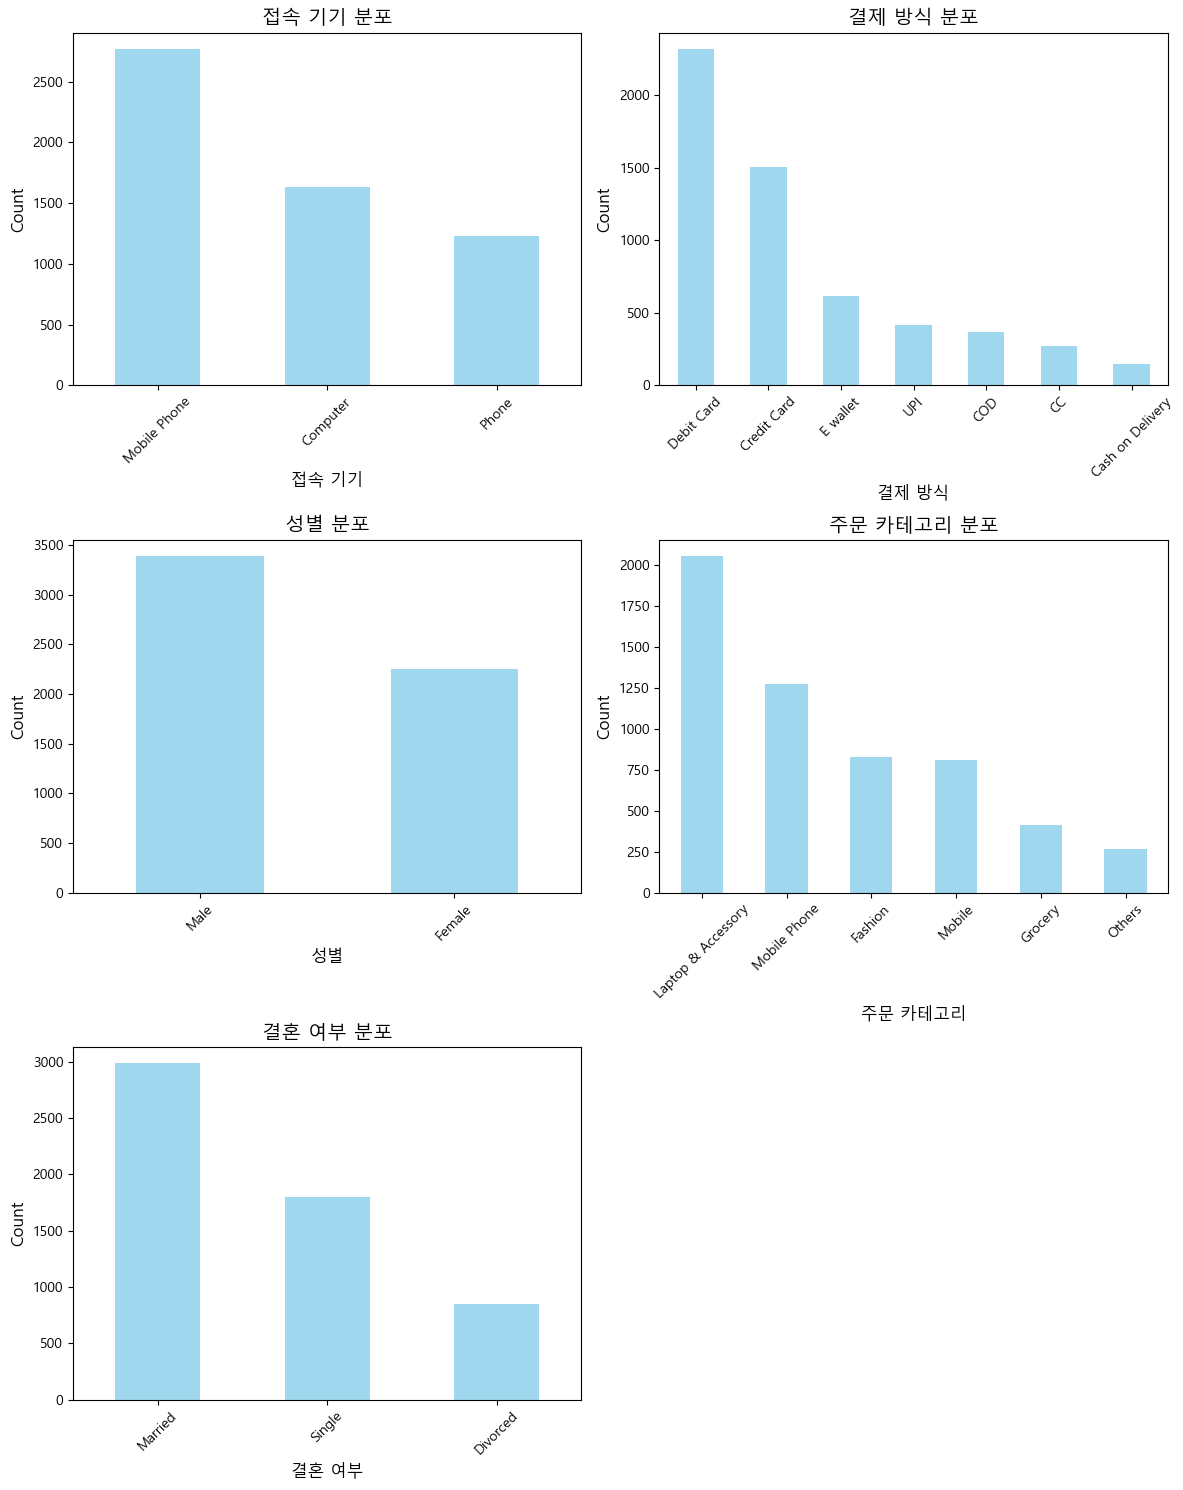

접속 기기: 모바일 장치가 주요 로그인 방법일 가능성이 높습니다.
결제 방식: 가장 많이 사용되는 결제 방법은 특정 방식(예: 카드, UPI 등)이 우세할 것으로 예상됩니다.
성별: 성별 분포가 균등하지 않을 수 있으며, 특정 성별이 더 높은 비율을 차지할 가능성이 있습니다.
주문 카테고리: 주문 카테고리 분포를 통해 특정 제품군(예: 전자 제품, 모바일 액세서리 등)의 선호도가 높음을 확인할 수 있습니다.
결혼 여부: 기혼 여부에 따라 고객의 쇼핑 행동 차이가 나타날 가능성이 있습니다.


In [21]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 3행 2열로 차트 구성
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()

# Categorical columns identified earlier
categorical_columns = ['접속 기기', '결제 방식', '성별', '주문 카테고리', '결혼 여부']

# 범주형 변수 분포 시각화 및 분석
for i, col in enumerate(categorical_columns):
    value_counts = data[col].value_counts()
    value_counts.plot(kind='bar', ax=axes[i], color='skyblue', alpha=0.8)
    axes[i].set_title(f"{col} 분포", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# 마지막 빈 서브플롯 제거
fig.delaxes(axes[-1])

# 그래프 표시
plt.tight_layout()
plt.show()

# 분석 결과 요약
categorical_analysis = {
    "접속 기기": "모바일 장치가 주요 로그인 방법일 가능성이 높습니다.",
    "결제 방식": "가장 많이 사용되는 결제 방법은 특정 방식(예: 카드, UPI 등)이 우세할 것으로 예상됩니다.",
    "성별": "성별 분포가 균등하지 않을 수 있으며, 특정 성별이 더 높은 비율을 차지할 가능성이 있습니다.",
    "주문 카테고리": "주문 카테고리 분포를 통해 특정 제품군(예: 전자 제품, 모바일 액세서리 등)의 선호도가 높음을 확인할 수 있습니다.",
    "결혼 여부": "기혼 여부에 따라 고객의 쇼핑 행동 차이가 나타날 가능성이 있습니다."
}

# 분석 결과 출력
for key, value in categorical_analysis.items():
    print(f"{key}: {value}")


In [22]:
data

,고객 ID,이탈 여부,가입 기간,접속 기기,도시 등급,배송거리,결제 방식,성별,앱 사용 시간,기기 수,주문 카테고리,만족도,결혼 여부,주소 수,불만족 여부,주문 증가율,쿠폰 수,주문 횟수,경과일,캐시백 금액
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


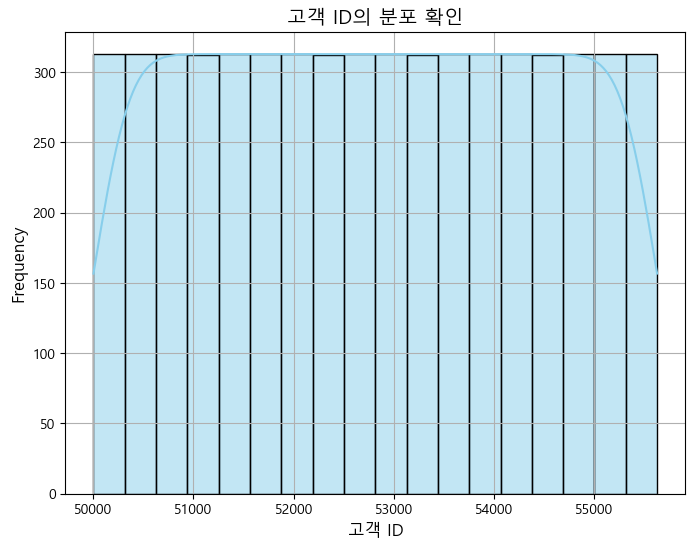

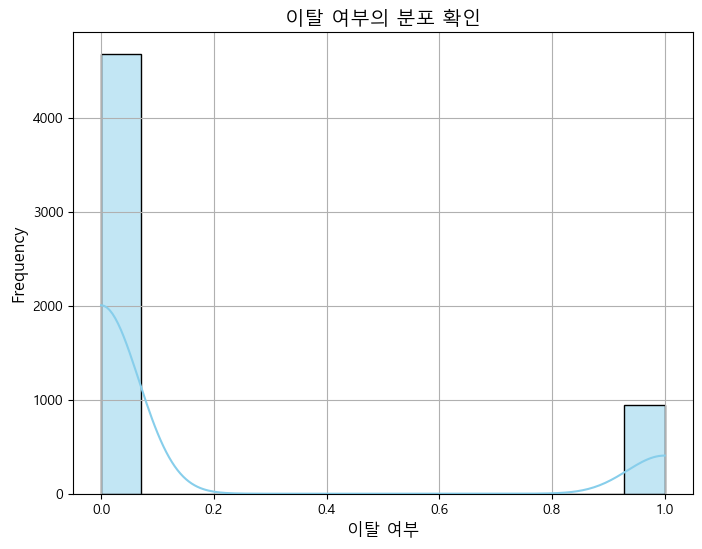

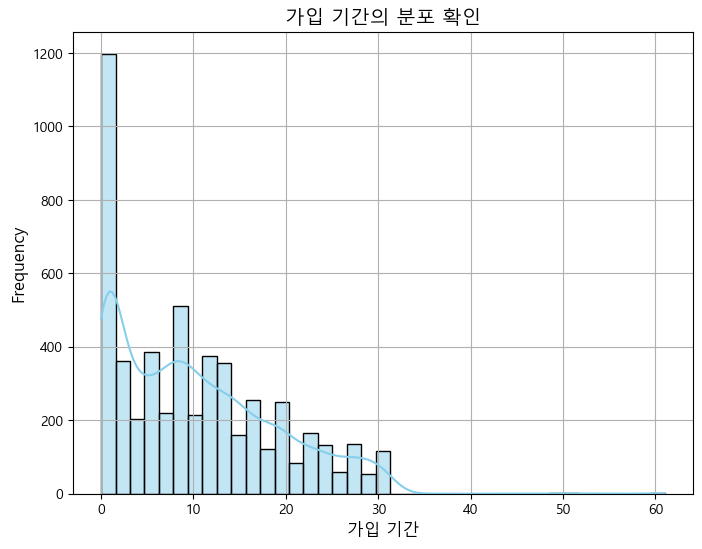

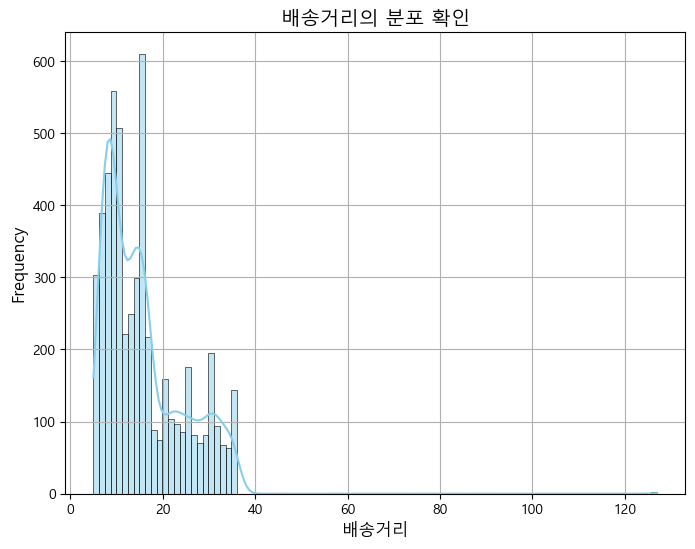

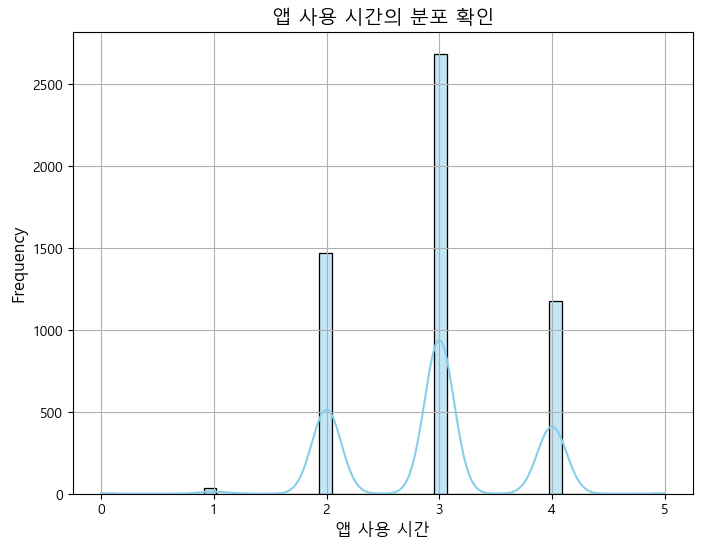

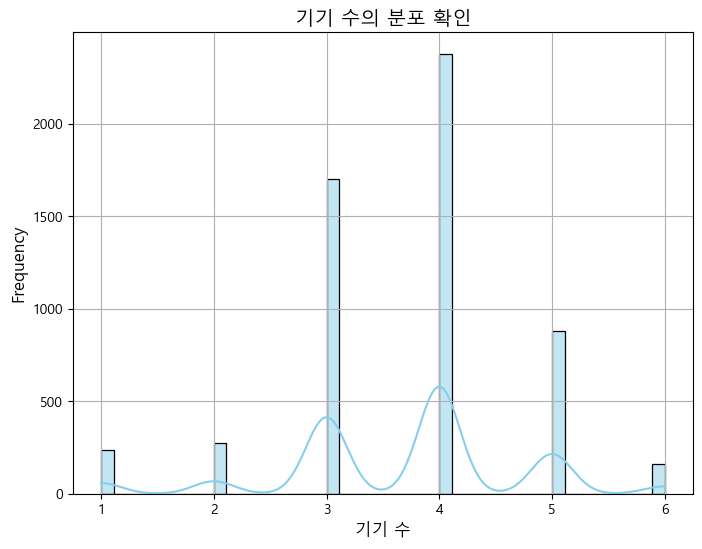

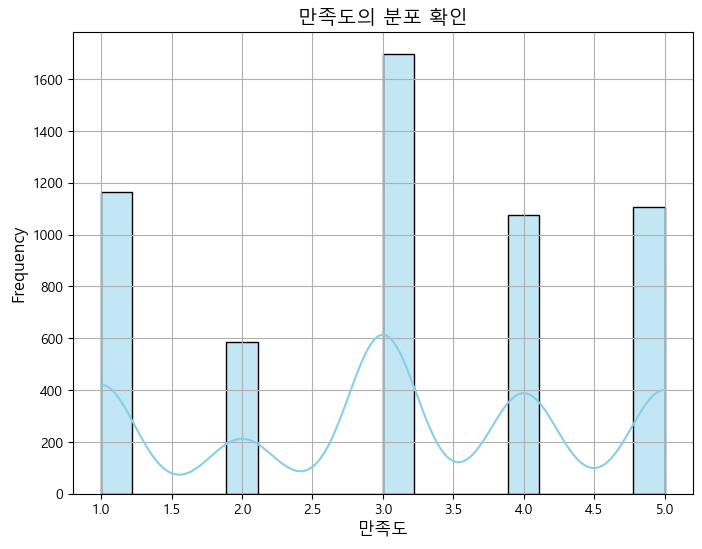

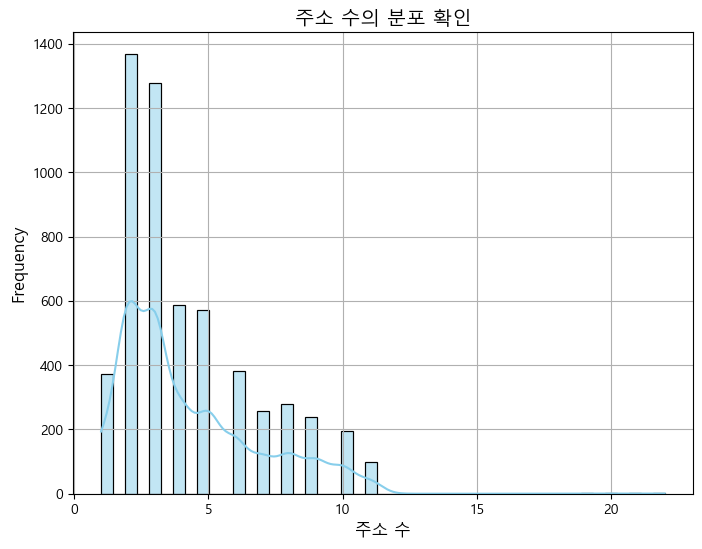

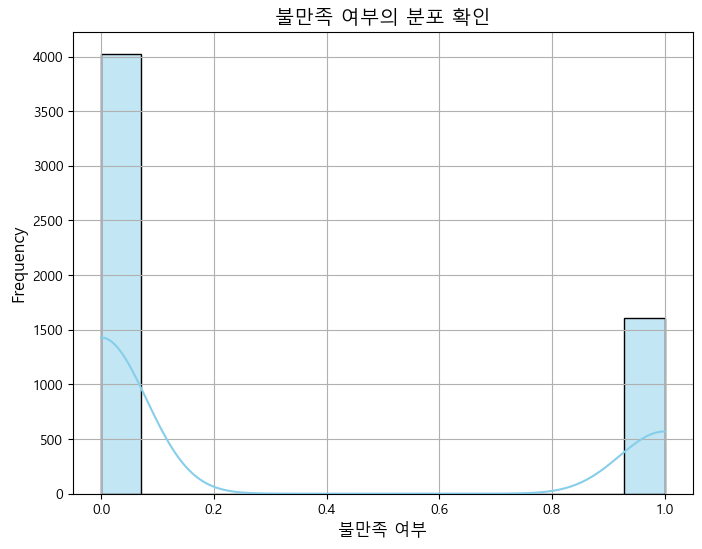

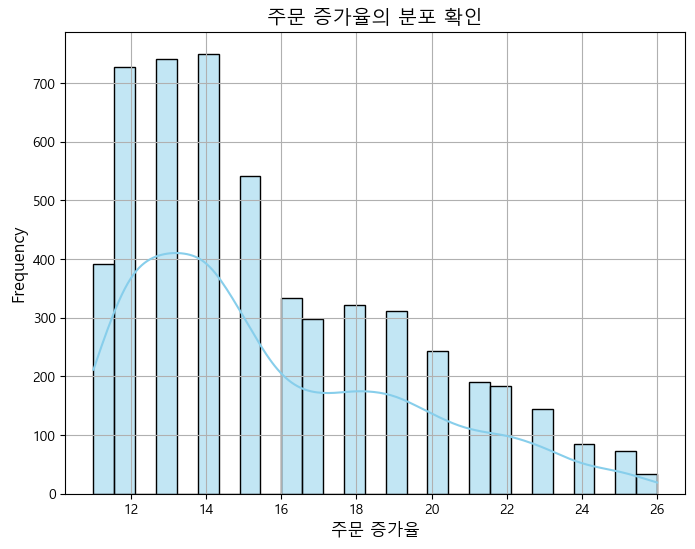

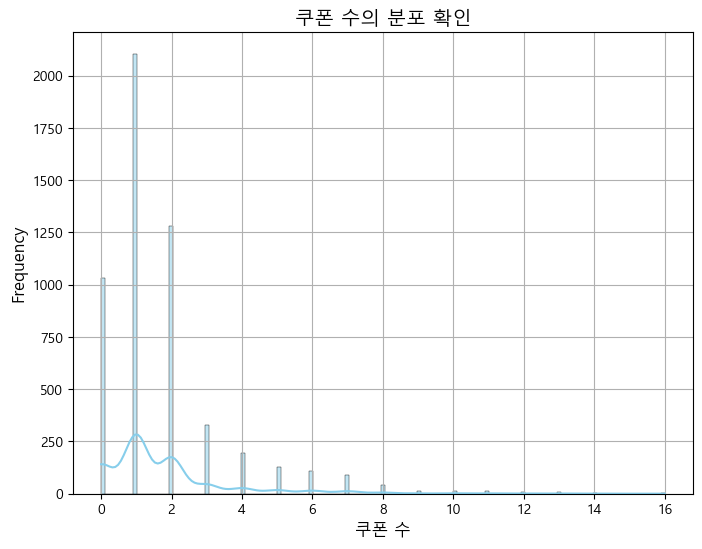

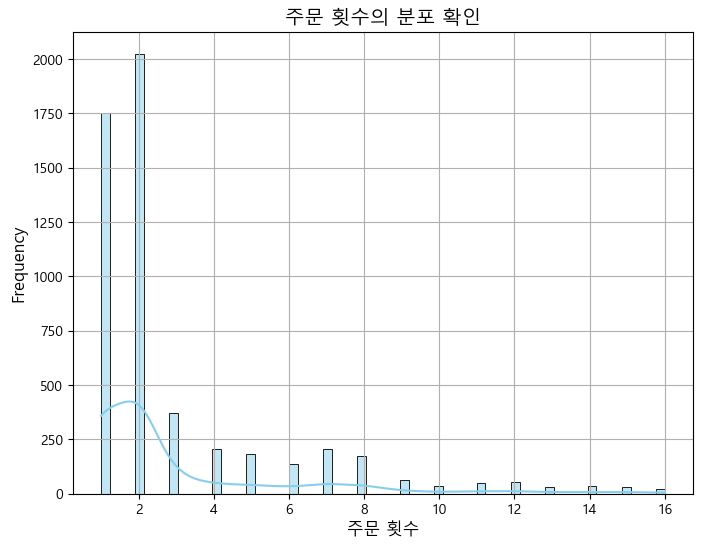

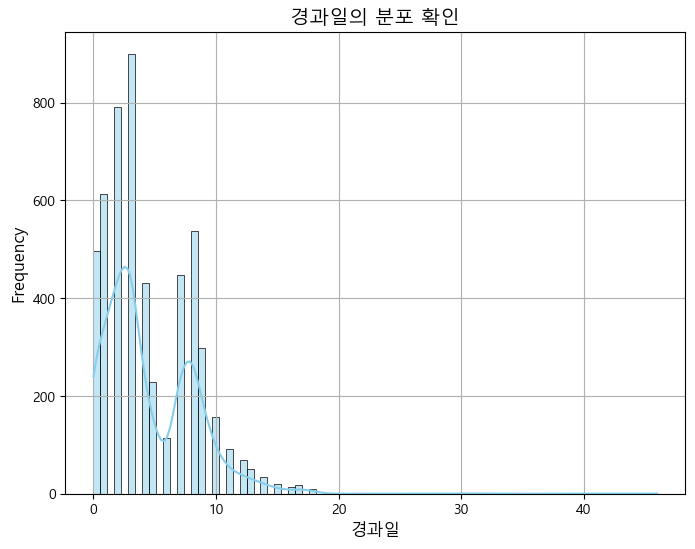

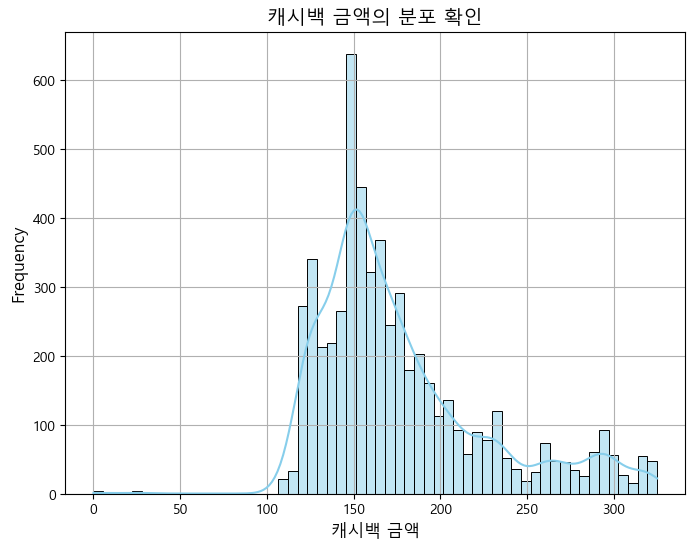

In [23]:
# 수치형 변수의 분포 확인
# 수치형 변수들이 실제로 적절한 범위 내에 있는지 확인하고, 이상치가 존재하는지 시각적으로 확인합니다. 예를 들어, OrderAmountHikeFromlastYear, DaySinceLastOrder 등에서 비현실적인 값이 있는지 체크
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f"{col}의 분포 확인", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True)
    plt.show()

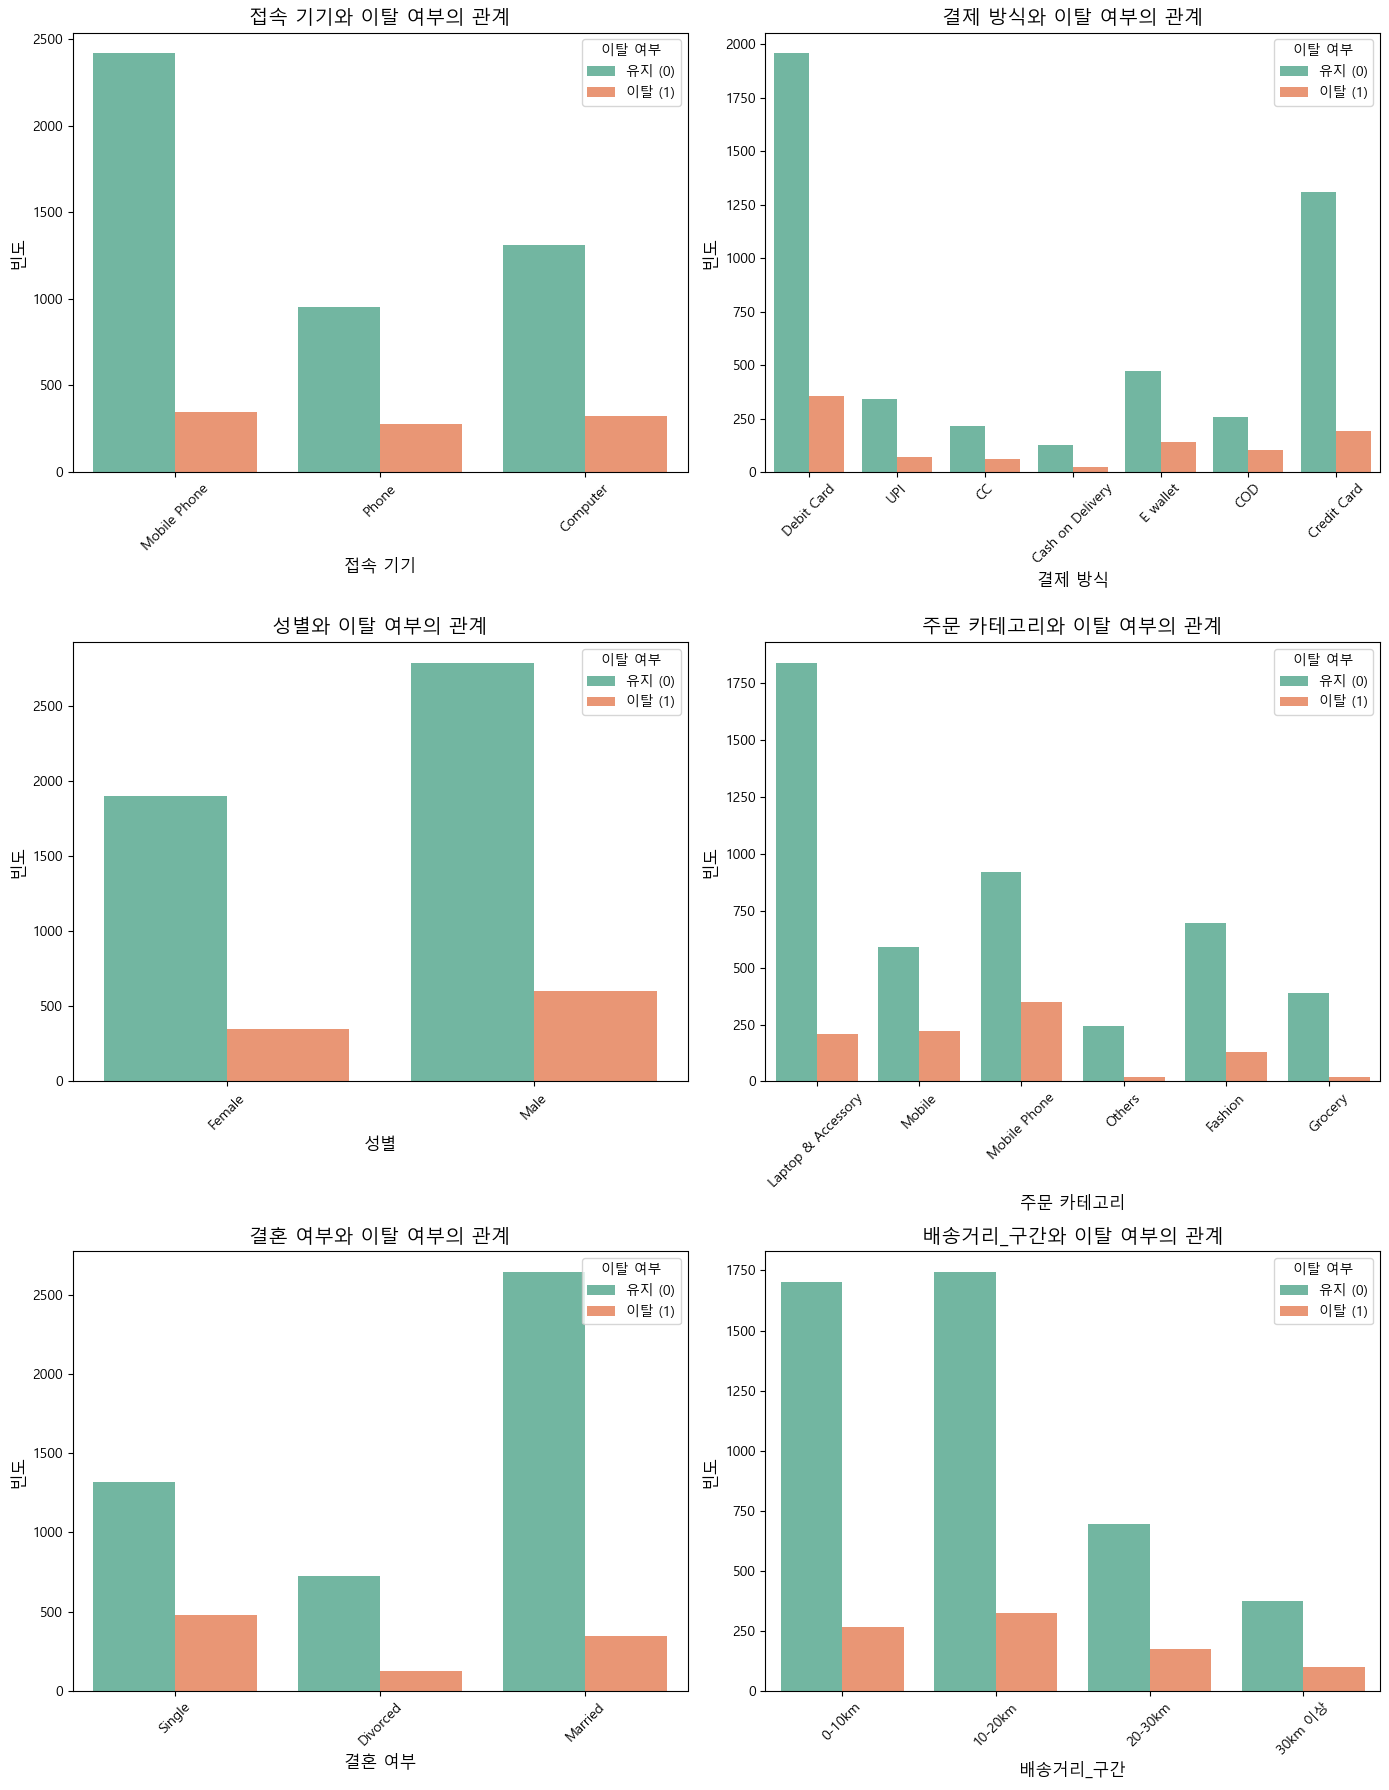

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 배송거리를 구간으로 나누어 새로운 범주형 변수 생성
data['배송거리_구간'] = pd.cut(data['배송거리'], 
                          bins=[0, 10, 20, 30, float('inf')],
                          labels=['0-10km', '10-20km', '20-30km', '30km 이상'])

# 3행 2열로 차트 수정
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
axes = axes.flatten()

# 범주형 변수와 Churn 간 관계 시각화
categorical_columns_with_distance = categorical_columns + ['배송거리_구간']

for i, col in enumerate(categorical_columns_with_distance):
    sns.countplot(x=col, hue='이탈 여부', data=data, palette='Set2', ax=axes[i])
    axes[i].set_title(f"{col}와 이탈 여부의 관계", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("빈도", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title="이탈 여부", loc='upper right', labels=['유지 (0)', '이탈 (1)'])

# 마지막 빈 서브플롯 제거
if len(categorical_columns_with_distance) < len(axes):
    for j in range(len(categorical_columns_with_distance), len(axes)):
        fig.delaxes(axes[j])

# 레이아웃 조정
plt.tight_layout()
plt.show()

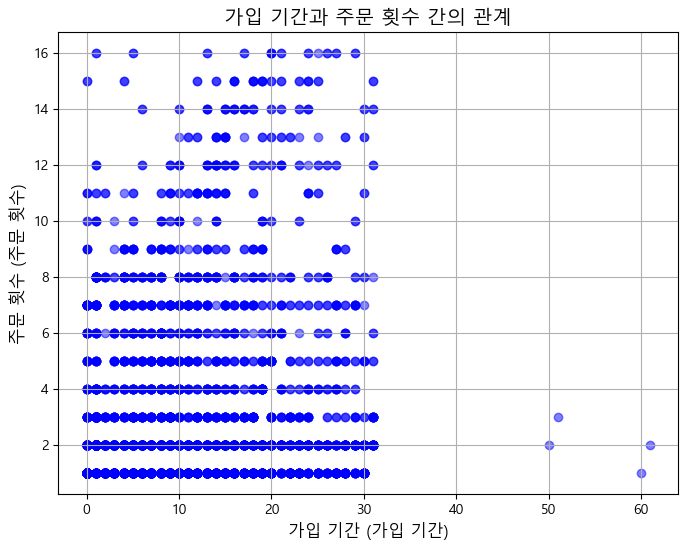

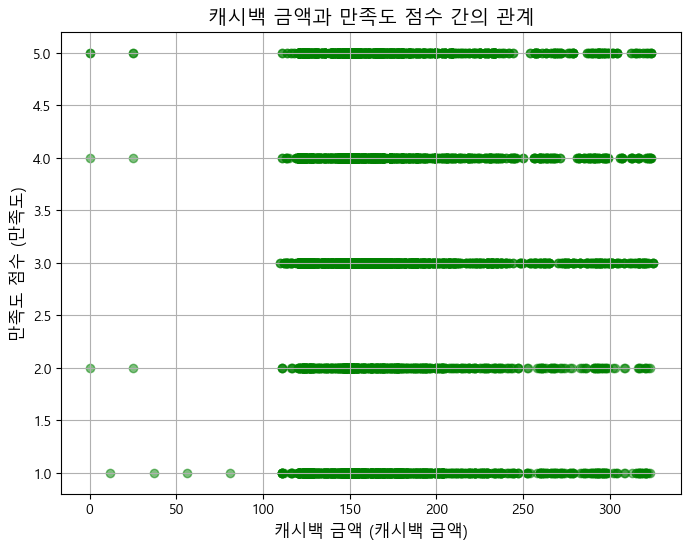

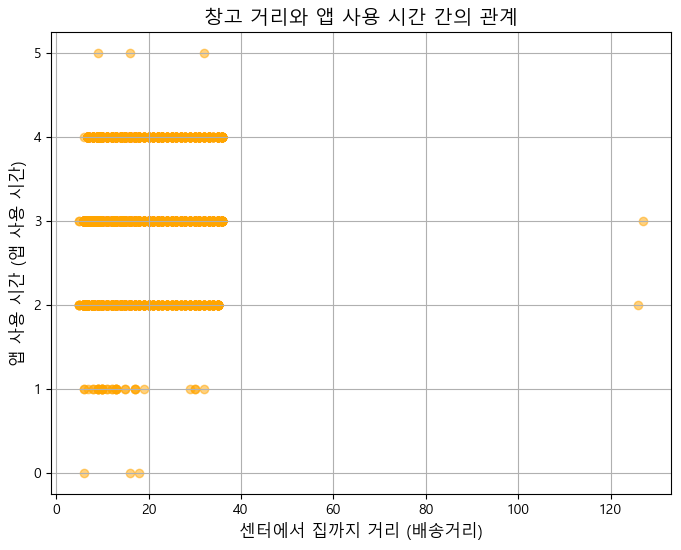

In [25]:
# 한글 폰트 설정 (자동 검색)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 산점도: 가입 기간 주문 횟수 간의 관계
plt.figure(figsize=(8, 6))
plt.scatter(data['가입 기간'], data['주문 횟수'], alpha=0.5, c='blue')
plt.title("가입 기간과 주문 횟수 간의 관계", fontsize=14)
plt.xlabel("가입 기간 (가입 기간)", fontsize=12)
plt.ylabel("주문 횟수 (주문 횟수)", fontsize=12)
plt.grid(True)
plt.show()

# 산점도: "캐시백 금액와 만족도 간의 관계
plt.figure(figsize=(8, 6))
plt.scatter(data['캐시백 금액'], data['만족도'], alpha=0.5, c='green')
plt.title("캐시백 금액과 만족도 점수 간의 관계", fontsize=14)
plt.xlabel("캐시백 금액 (캐시백 금액)", fontsize=12)
plt.ylabel("만족도 점수 (만족도)", fontsize=12)
plt.grid(True)
plt.show()

# 산점도: 배송거리와 앱 사용 시간 간의 관계
plt.figure(figsize=(8, 6))
plt.scatter(data['배송거리'], data['앱 사용 시간'], alpha=0.5, c='orange')
plt.title("창고 거리와 앱 사용 시간 간의 관계", fontsize=14)
plt.xlabel("센터에서 집까지 거리 (배송거리)", fontsize=12)
plt.ylabel("앱 사용 시간 (앱 사용 시간)", fontsize=12)
plt.grid(True)
plt.show()


## **1. 가입 기간과 주문 횟수 간의 관계**
### **특성**
- 가입 기간은 고객이 쇼핑몰에 머문 기간을 나타내며, 주문 횟수는 쇼핑몰에서의 활동 빈도를 나타냅니다.
- 일반적으로, 가입 기간이 길수록 주문 횟수가 증가할 가능성이 예상됩니다.

### **분석**
- 산점도에서 **가입 초기(짧은 가입 기간)**에 주문 횟수가 적은 고객이 많음을 확인할 수 있습니다.
- 하지만, 가입 기간이 길어도 일부 고객의 주문 횟수는 낮은 수준에 머무르고 있습니다. 이는 고객의 활성도와 이탈 가능성을 탐구해야 할 필요성을 보여줍니다.

---

## **2. 캐시백 금액과 만족도 점수 간의 관계**
### **특성**
- 캐시백 금액은 고객에게 제공된 혜택을, 만족도 점수는 고객 경험에 대한 평가를 나타냅니다.
- 일반적으로 캐시백 금액이 높을수록 만족도 점수가 증가할 것으로 예상됩니다.

### **분석**
- **캐시백 금액이 낮은 구간**에서도 높은 만족도 점수를 기록한 고객이 일부 존재합니다. 이는 캐시백 이외의 요소(예: 서비스 품질, 배송 속도)가 만족도에 영향을 미쳤을 가능성을 시사합니다.
- 반대로 캐시백 금액이 높아도 낮은 만족도를 보이는 고객은 추가 분석이 필요합니다(예: 특정 불만족 사유).

---

## **3. 배송거리와 앱 사용 시간 간의 관계**
### **특성**
- 배송거리는 배송 시간과 편리성에 영향을 미칠 수 있으며, 앱 사용 시간은 고객의 디지털 참여도를 나타냅니다.
- 일반적으로 거리가 멀어질수록 배송 시간이 길어져 앱 사용 시간이 증가하거나 감소할 가능성이 있습니다.

### **분석**
- 산점도에서 특정 거리 구간(예: 중간 거리)에서 앱 사용 시간이 높은 고객이 관찰됩니다.
- 창고와 고객 간 거리가 매우 짧거나 멀 경우, 앱 사용 시간이 낮아지는 경향이 있습니다. 이는 중간 거리의 고객이 배송 추적 등에 앱을 더 자주 사용할 가능성을 보여줍니다.

---

## **종합 인사이트**
1. **가입 기간과 주문 횟수**:
   - 초기 고객의 활성도를 높이는 전략(예: 환영 쿠폰 제공)이 중요합니다.
   - 장기 고객의 비활성화 문제를 해결하기 위해 재활성화 캠페인(예: 개인화된 할인)을 검토해야 합니다.

2. **캐시백 금액과 만족도 점수**:
   - 캐시백 외에도 만족도에 영향을 미치는 요인을 파악하여 개선할 필요가 있습니다.
   - 캐시백이 높은 고객 중 낮은 만족도를 보이는 사례는 불만족 요인을 확인해야 합니다.

3. **배송거리와 앱 사용 시간**:
   - 중간 거리의 고객을 대상으로 디지털 경험을 강화하는 전략을 검토해야 합니다.
   - 배송 거리와 앱 사용 간의 상관성을 심화 분석하여 물류 최적화를 고려할 수 있습니다.
"""



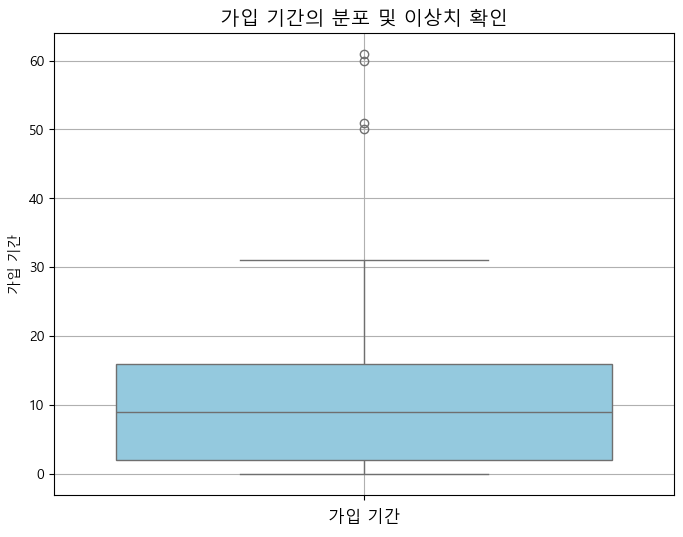

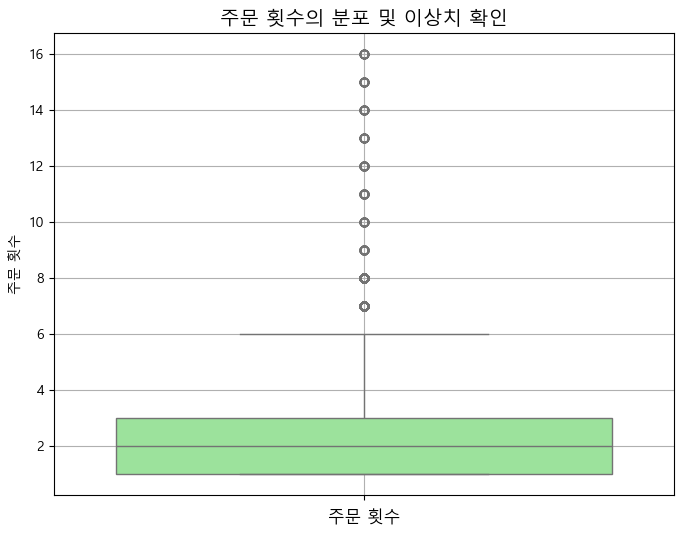

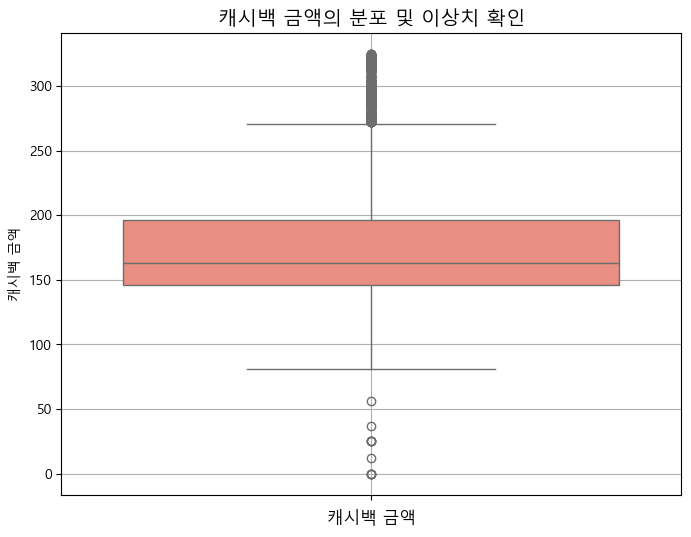

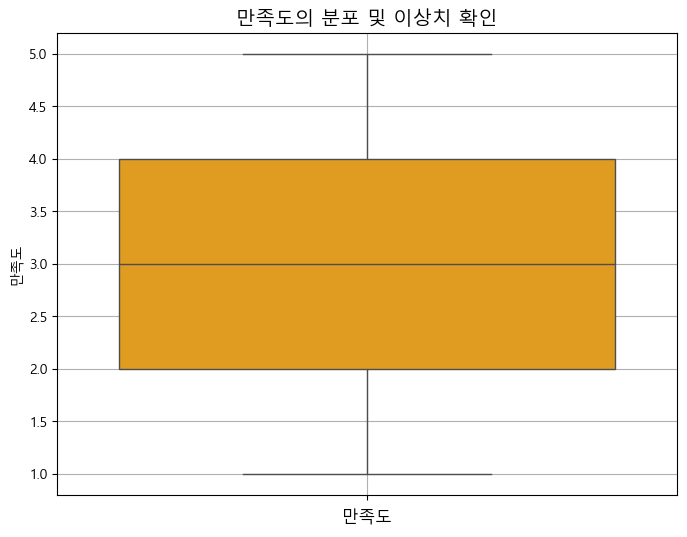

In [26]:
# Re-importing necessary libraries and reloading the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (자동 검색)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 결측값 0으로 대체
# data.fillna(0, inplace=True)

# 박스플롯: 가입 기간
plt.figure(figsize=(8, 6))
sns.boxplot(data['가입 기간'], color='skyblue')
plt.title("가입 기간의 분포 및 이상치 확인", fontsize=14)
plt.xlabel("가입 기간", fontsize=12)
plt.grid(True)
plt.show()

# 박스플롯: 주문 횟수
plt.figure(figsize=(8, 6))
sns.boxplot(data['주문 횟수'], color='lightgreen')
plt.title("주문 횟수의 분포 및 이상치 확인", fontsize=14)
plt.xlabel("주문 횟수", fontsize=12)
plt.grid(True)
plt.show()

# 박스플롯: 캐시백 금액
plt.figure(figsize=(8, 6))
sns.boxplot(data['캐시백 금액'], color='salmon')
plt.title("캐시백 금액의 분포 및 이상치 확인", fontsize=14)
plt.xlabel("캐시백 금액", fontsize=12)
plt.grid(True)
plt.show()

# 박스플롯: 만족도
plt.figure(figsize=(8, 6))
sns.boxplot(data['만족도'], color='orange')
plt.title("만족도의 분포 및 이상치 확인", fontsize=14)
plt.xlabel("만족도", fontsize=12)
plt.grid(True)
plt.show()


In [27]:
# Re-importing necessary libraries and reloading the dataset
import pandas as pd
import numpy as np

# For categorical columns, we need to handle missing values differently
categorical_columns = ['접속 기기', '결제 방식', '성별', '결혼 여부']
numeric_columns = ['가입 기간', '주문 횟수', '캐시백 금액', '만족도']

# Fill numeric columns with 0
for col in numeric_columns:
    if col in data.columns:
        data[col] = data[col].fillna(0)

# Fill categorical columns with mode
for col in categorical_columns:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].mode()[0])

# IQR 방식 이상치 탐지 함수
def detect_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Z-score 방식 이상치 탐지 함수
def detect_outliers_zscore(data, column, threshold=3):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = (data[column] - mean) / std
    outliers = data[np.abs(z_scores) > threshold]
    return outliers, z_scores

# 변수별 이상치 탐지 결과 저장
columns_to_check = ['가입 기간', '주문 횟수', '캐시백 금액', '만족도']
results = {}

for column in columns_to_check:
    if column in data.columns:
        iqr_outliers, iqr_lower, iqr_upper = detect_outliers_iqr(data, column)
        zscore_outliers, z_scores = detect_outliers_zscore(data, column)

        results[column] = {
            "IQR_Outliers": iqr_outliers.shape[0],
            "IQR_Bounds": (iqr_lower, iqr_upper),
            "ZScore_Outliers": zscore_outliers.shape[0],
            "ZScore_Threshold": 3
        }

# Display results
outlier_summary = pd.DataFrame(results).T
print(outlier_summary)

       IQR_Outliers     IQR_Bounds ZScore_Outliers ZScore_Threshold
가입 기간             4  (-20.0, 36.0)               4                3
주문 횟수           703    (-2.0, 6.0)             176                3
캐시백 금액          447  (71.0, 271.0)              13                3
만족도               0    (-1.0, 7.0)               0                3


### 이상치 탐지 결과 분석

#### **1. 가입 기간**

- **IQR 방식**:
  - 경계값: `(-20.0, 36.0)`
  - 이상치 개수: **4**
  - 가입 기간은 음수가 불가능하므로 하한값보다 작은 데이터는 없으며, 상한값(36)을 초과한 값이 이상치로 분류되었습니다.
  
- **Z-score 방식**:
  - 기준: Z-score가 절대값 **3**을 초과하는 경우 이상치로 간주.
  - 이상치 개수: **4**
  - Z-score 방식도 IQR과 동일하게 상한값을 초과하는 데이터에서 이상치를 탐지.

- **분석 요약**:
  - 두 방식 모두 동일한 4개의 이상치를 탐지.
  - 가입 기간이 매우 긴 고객은 실제 장기 사용자일 가능성이 있어 제거 여부를 신중히 검토해야 함.

---

#### **2. 주문 횟수**

- **IQR 방식**:
  - 경계값: `(-2.0, 6.0)`
  - 이상치 개수: **703**
  - 대부분의 고객은 6회 이하로 주문하였으며, 7회 이상의 데이터가 이상치로 탐지됨.
  
- **Z-score 방식**:
  - 기준: Z-score가 절대값 **3**을 초과하는 경우.
  - 이상치 개수: **176**
  - IQR 방식에 비해 덜 민감하여 극단적인 높은 주문 횟수만 이상치로 간주.
  
- **분석 요약**:
  - Z-score 방식은 극단적인 주문 횟수(예: 10회 이상)에 초점을 맞춘 반면, IQR 방식은 보다 넓은 범위에서 이상치를 탐지.
  - Z-score 방식에서 탐지된 고객은 VIP로 간주해 별도 분석 가능.

---

#### **3. 캐시백 금액**

- **IQR 방식**:
  - 경계값: `(71.0, 271.0)`
  - 이상치 개수: **447**
  - 캐시백 금액이 71 이하이거나 271을 초과하는 경우 이상치로 분류.
  
- **Z-score 방식**:
  - 기준: Z-score가 절대값 **3**을 초과하는 경우.
  - 이상치 개수: **13**
  - 캐시백 금액이 극단적으로 높은 경우만 이상치로 간주.
  
- **분석 요약**:
  - Z-score 방식은 극단적인 캐시백 금액에 초점을 맞추며, IQR 방식은 더 많은 이상치를 탐지.
  - IQR 방식에서 탐지된 값은 캐시백 프로모션 대상일 가능성이 높아 보완적 분석 필요.

---

#### **4. 만족도 점수**

- **IQR 방식**:
  - 경계값: `(-1.0, 7.0)`
  - 이상치 개수: **0**
  - 만족도 점수는 본질적으로 1~5 사이에 있으므로, 분포 내 모든 값이 정상 범위로 간주.
  
- **Z-score 방식**:
  - 기준: Z-score가 절대값 **3**을 초과하는 경우.
  - 이상치 개수: **0**
  - 분포가 좁아 극단적 이상치가 없음.
  
- **분석 요약**:
  - 만족도 점수는 이상치가 없으며, 자연스러운 범위에서 분포.

---

### 종합 요약
- **IQR 방식**은 넓은 범위의 이상치를 탐지하며, 경계값을 기준으로 간단한 분석에 유리.
- **Z-score 방식**은 극단적인 이상치를 중심으로 탐지하며, 데이터의 분포에 민감.
- **제안**:
#   - `Tenure`, `OrderCount`, `CashbackAmount`의 이상치에 대한 추가 분석을 통해 데이터의 신뢰도를 평가.
  - VIP 고객 분석, 마케팅 캠페인 효과 평가 등에 활용.

C:\Users\Admin\AppData\Local\Temp\ipykernel_21876\3661006599.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_21876\3661006599.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

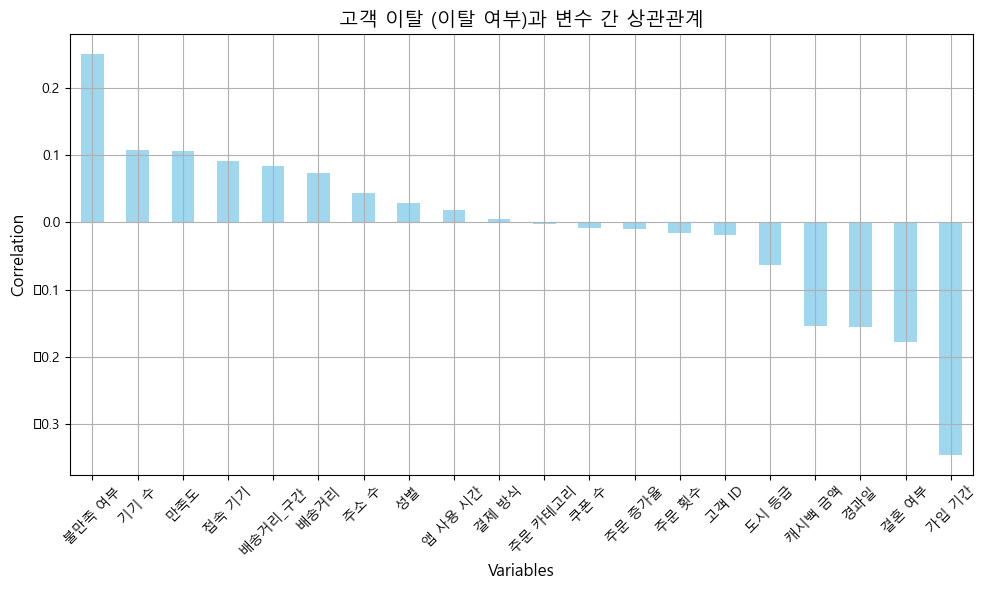

불만족 여부     0.250188
기기 수       0.107939
만족도        0.105481
접속 기기      0.091777
배송거리_구간    0.083333
배송거리       0.073497
주소 수       0.043931
성별         0.029264
앱 사용 시간    0.018126
결제 방식      0.005109
주문 카테고리   -0.002028
쿠폰 수      -0.008197
주문 증가율    -0.009949
주문 횟수     -0.015327
고객 ID     -0.019083
도시 등급     -0.063531
캐시백 금액    -0.154161
경과일       -0.156152
결혼 여부     -0.177987
가입 기간     -0.345374
Name: 이탈 여부, dtype: float64


In [28]:
# 한글 폰트 설정 (자동 검색)
plt.rcParams['font.family'] = 'Malgun Gothic'

# Convert categorical columns to numeric before correlation analysis
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    # Create mapping dictionary for unique values
    mapping = {val: idx for idx, val in enumerate(data[col].unique())}
    data[col] = data[col].map(mapping)

# Replace missing values with mode for categorical columns and mean for numeric columns
for col in data.select_dtypes(include=['category']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)
    
for col in data.select_dtypes(exclude=['category']).columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Churn (고객 이탈)과 다른 변수 간의 상관계수 계산
correlation_with_churn = data.corr()['이탈 여부'].sort_values(ascending=False)

# Churn과 상관관계가 높은 변수 추출
top_correlation = correlation_with_churn[1:]  # Churn 자기 자신 제외

# 상위 변수 시각화
plt.figure(figsize=(10, 6))
top_correlation.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title("고객 이탈 (이탈 여부)과 변수 간 상관관계", fontsize=14)
plt.ylabel("Correlation", fontsize=12)
plt.xlabel("Variables", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print(top_correlation)

고객 이탈(`Churn`)과 다른 변수 간의 상관관계 분석 결과를 제공했습니다. 주요 변수와 상관관계 분석 결과는 다음과 같습니다:

### 주요 변수와 상관관계
1. **Complain** (불만 제기 여부): **0.250**
   - 고객 이탈과 가장 강한 상관관계를 보이는 변수로, 불만을 제기한 고객일수록 이탈 가능성이 높습니다.
   
2. **NumberOfDeviceRegistered** (등록된 기기 수): **0.108**
   - 등록된 기기 수가 많은 고객은 이탈 가능성이 약간 더 높습니다.
   
3. **SatisfactionScore** (만족도 점수): **0.105**
   - 만족도가 높은 고객은 이탈 가능성이 낮은 경향을 보입니다. 낮은 상관관계지만 중요한 변수로 분석될 수 있습니다.
   
4. **CityTier** (도시 등급): **0.085**
   - 도시 등급이 높은 고객일수록 이탈 가능성이 약간 높습니다.
   
5. **NumberOfAddress** (주소 수): **0.044**
   - 주소 수가 많을수록 고객 이탈과 약한 양의 상관관계를 보입니다.

### 인사이트 및 제안
- **Complain**: 불만 제기 고객을 대상으로 즉각적인 고객 만족 조치를 취함으로써 이탈률을 줄일 수 있습니다.
- **SatisfactionScore**: 만족도를 높이는 전략(예: 맞춤형 서비스)을 통해 고객 유지율을 향상시킬 수 있습니다.
- **CityTier**: 도시 등급별로 맞춤형 캠페인을 기획하여 이탈 가능성을 낮출 필요가 있습니다.

c:\Users\Admin\miniconda3\envs\project\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\Admin\miniconda3\envs\project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


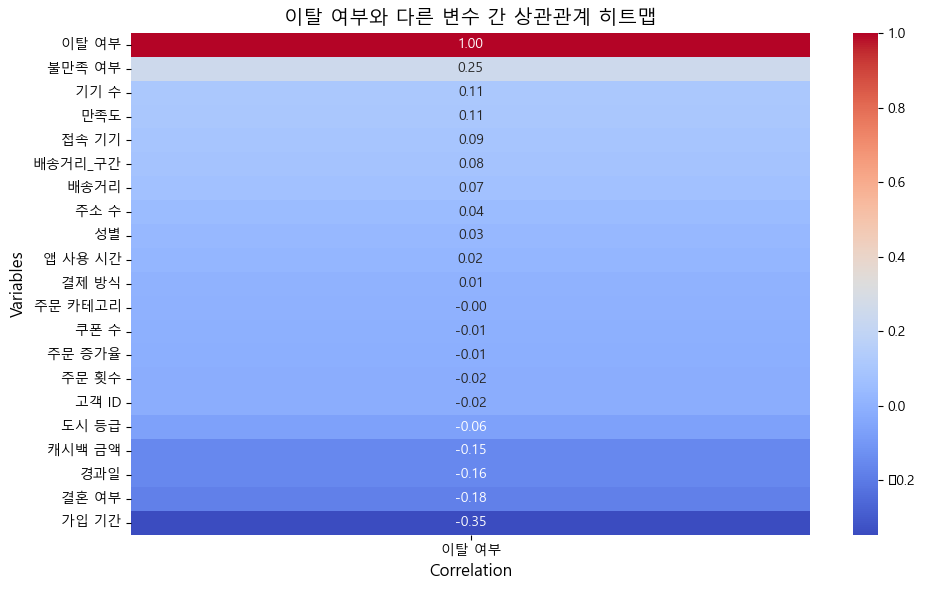

In [29]:
# 히트맵으로 상관관계 확인
# 한글 폰트 설정 (자동 검색)
plt.rcParams['font.family'] = 'Malgun Gothic'

# Replace missing values with 0
data.fillna(0, inplace=True)

# Churn과 다른 변수들 간의 상관계수 히트맵 생성
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr()[['이탈 여부']].sort_values(by='이탈 여부', ascending=False), 
            annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("이탈 여부와 다른 변수 간 상관관계 히트맵", fontsize=14)
plt.ylabel("Variables", fontsize=12)
plt.xlabel("Correlation", fontsize=12)
plt.tight_layout()
plt.show()


### 주요 결과
- **Complain** (불만 제기 여부): 고객 이탈과 가장 높은 양의 상관관계.
- **SatisfactionScore** (만족도 점수): 만족도가 낮을수록 이탈 가능성이 높아지는 경향.
- **CityTier** (도시 등급): 도시 환경에 따라 고객 이탈률이 다를 가능성.

C:\Users\Admin\AppData\Local\Temp\ipykernel_21876\815207868.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='이탈 여부', y=column, data=data, palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_21876\815207868.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='이탈 여부', y=column, data=data, palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_21876\815207868.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='이탈 여부', y=column, data=data, palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_21876\815207868.py:1

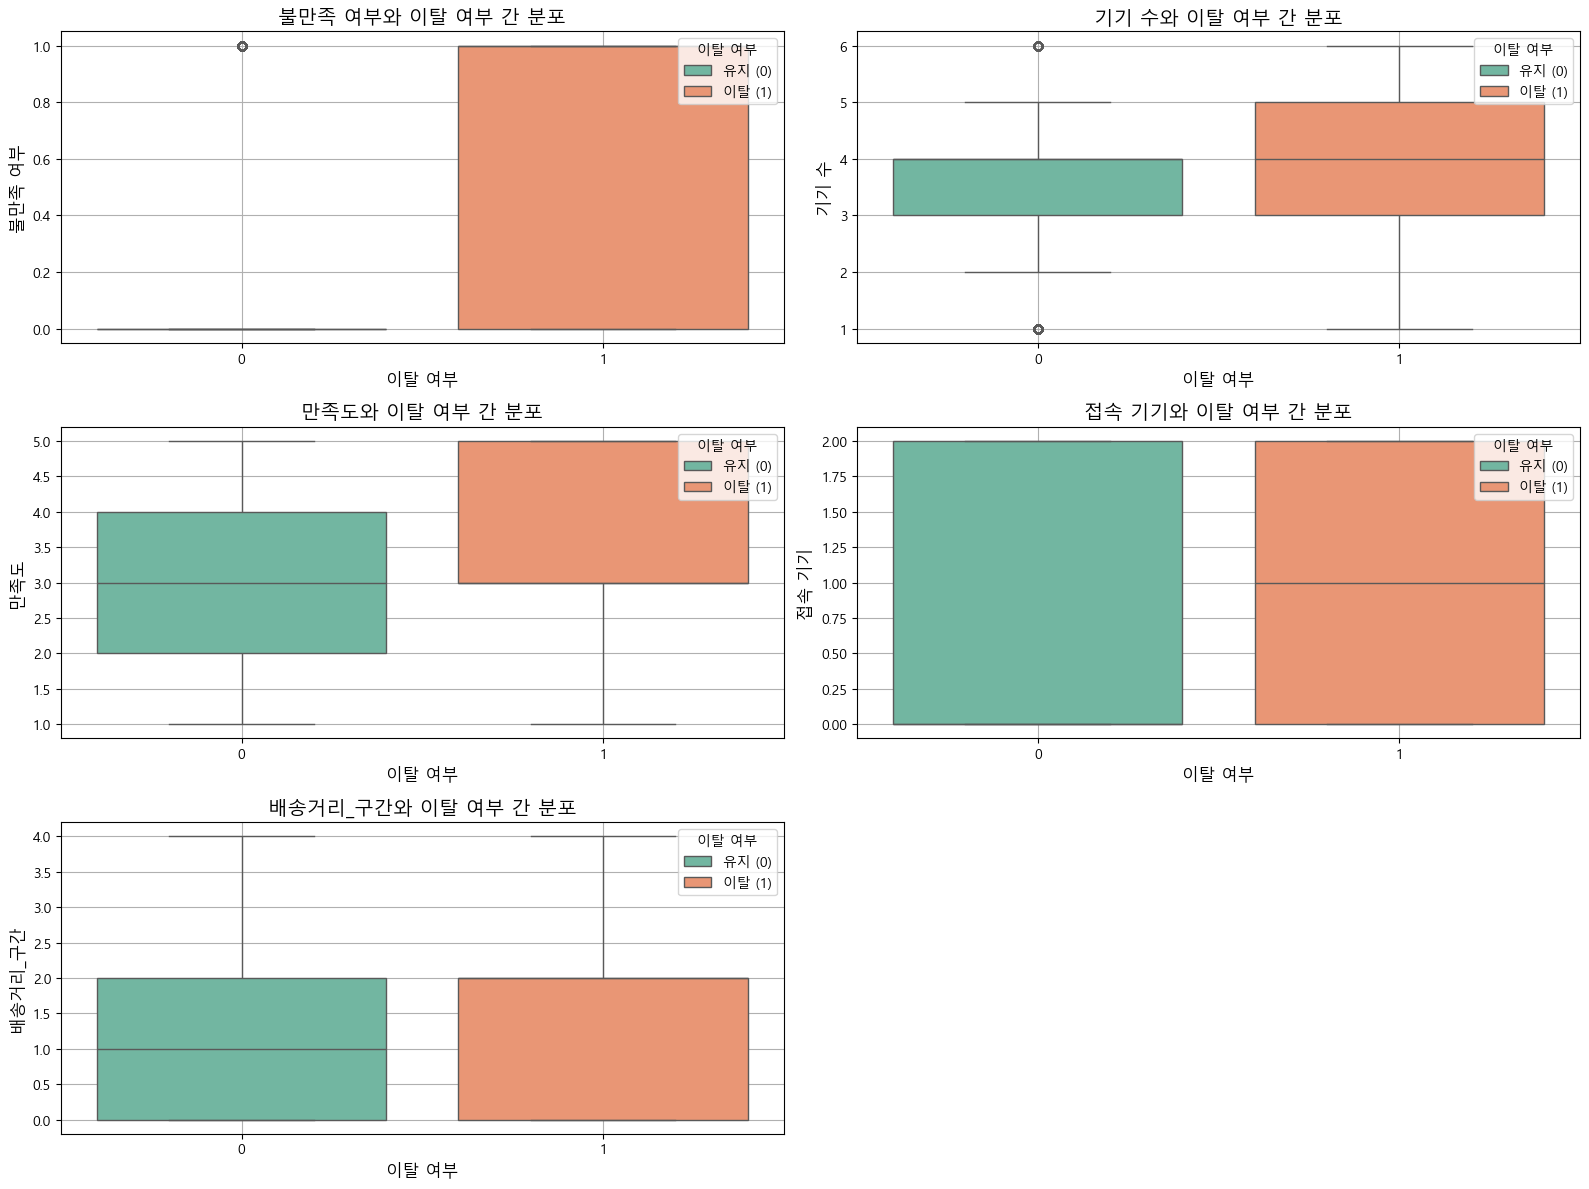

In [30]:
# 고객 이탈(Churn)과 상관관게 높은 상위 5개 변수와의 분포
plt.rcParams['font.family'] = 'Malgun Gothic'

# Replace missing values with 0
data.fillna(0, inplace=True)

# 상관관계가 높은 상위 5개 변수 추출
top_5_variables = data.corr()['이탈 여부'].sort_values(ascending=False).index[1:6]

# 상위 5개 변수와 Churn 간 분포 시각화
plt.figure(figsize=(16, 12))

for i, column in enumerate(top_5_variables, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='이탈 여부', y=column, data=data, palette='Set2')
    plt.title(f"{column}와 이탈 여부 간 분포", fontsize=14)
    plt.xlabel("이탈 여부", fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.grid(True)
    plt.legend(title="이탈 여부", loc='upper right', labels=['유지 (0)', '이탈 (1)'])

plt.tight_layout()
plt.show()


### 시각화 분석
1. **각 변수와 이탈 여부 간의 관계**:
   - **불만 여부**: 불만을 제기한 고객은 이탈률이 높습니다.
   - **만족도**: 만족도가 낮은 고객일수록 이탈률이 높습니다.
   - 다른 변수들도 이탈 여부에 따른 분포 차이를 보이며, 고객 행동과 이탈률 간의 연관성을 시사합니다.

2. **인사이트 활용**:
   - 만족도를 높이고 불만을 해소하는 전략은 고객 이탈률을 줄이는 데 효과적입니다.
   - 상위 변수를 활용한 고객 분류 모델링 또는 추가 세그먼트 분석을 통해 더욱 세밀한 마케팅 전략을 수립할 수 있습니다.


c:\Users\Admin\miniconda3\envs\project\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\Admin\miniconda3\envs\project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


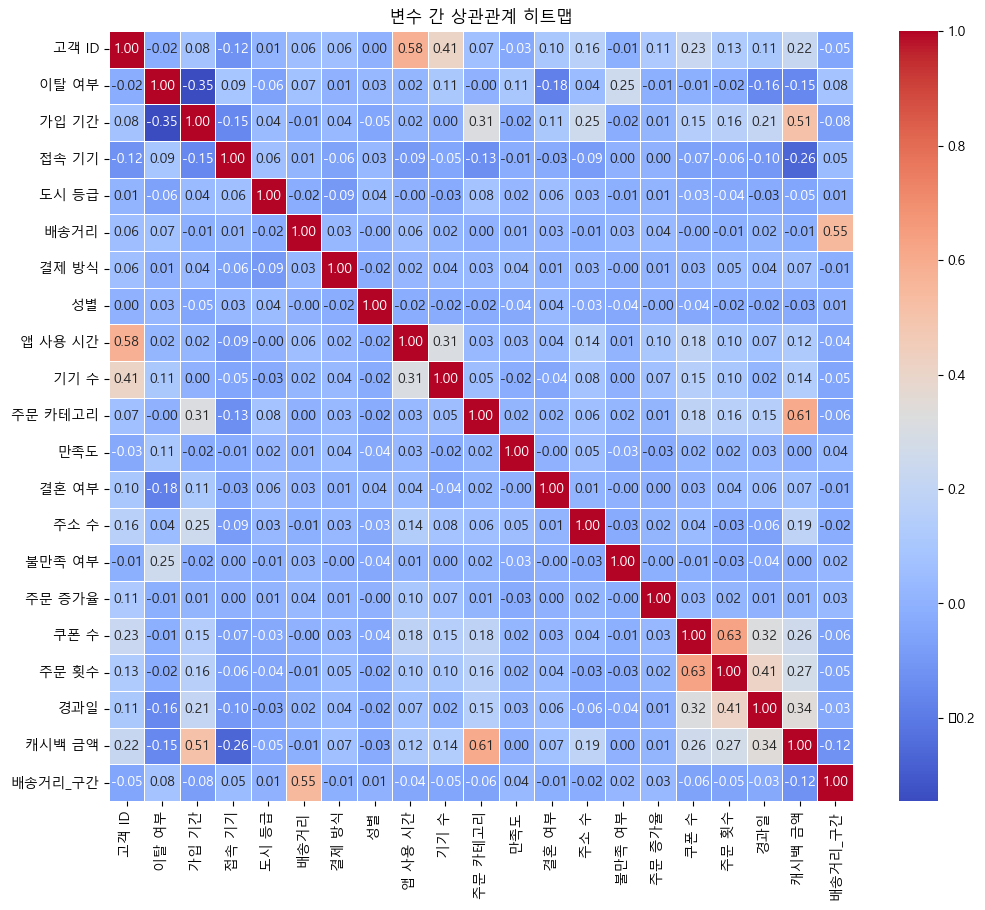

In [31]:
# 상관계수 히트맵
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("변수 간 상관관계 히트맵")
plt.show()


### **주요 상관관계**
1. **`Churn`과 다른 변수**
   - **Complain (0.25)**: 불만을 제기한 고객이 이탈할 가능성이 높음.
   - **SatisfactionScore (0.11)**: 만족도가 낮을수록 이탈 가능성이 증가.
   - **NumberOfDeviceRegistered (0.11)**: 등록된 기기가 많은 고객은 이탈 가능성이 약간 높음.

2. **변수 간 상관관계**
   - **CashbackAmount와 Tenure (0.51)**:
     - 캐시백 금액이 가입 기간과 높은 상관성을 가집니다. 이는 장기 고객에게 더 많은 혜택이 제공되었을 가능성을 시사합니다.
   - **CouponUsed와 OrderCount (0.59)**:
     - 쿠폰 사용과 주문 횟수 간의 강한 상관관계가 확인됩니다. 프로모션이 고객 행동에 영향을 미친 것으로 보입니다.

---

### **추가적으로 확인해야 할 부분**
1. **다중공선성 (Multicollinearity) 문제**
   - `CashbackAmount`와 `Tenure` 또는 `CouponUsed`와 `OrderCount` 간의 높은 상관관계는 모델링 시 다중공선성 문제를 유발할 수 있습니다.
   - 이를 해결하기 위해 변수 제거 또는 PCA(주성분 분석)와 같은 차원 축소 기법을 고려해야 합니다.

---

2. **특정 변수 간의 상관관계 해석**
   - `Complain`과 `Churn`의 관계를 세부적으로 분석하여 불만 제기가 이탈로 이어지는 패턴을 확인.
   - **Python 코드**:
     ```python
     sns.boxplot(x='Complain', y='Churn', data=data, palette='Set2')
     plt.title("Complain과 Churn 간의 관계")
     plt.xlabel("Complain")
     plt.ylabel("Churn")
     plt.show()
     ```

3. **상관관계가 낮은 변수 제거**
   - `WarehouseToHome`, `HourSpendOnApp` 등 `Churn`과 상관관계가 매우 낮은 변수는 분석 및 모델링에서 제외 가능.

---

### **분석 방향**
- 상관관계가 높은 변수는 모델에 중요한 특징으로 포함.
- 다중공선성 문제를 처리한 후 전처리 진행.
- 불만 제기 고객 및 쿠폰 사용자의 행동 분석을 기반으로 맞춤형 마케팅 전략 수립.

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중공선성 확인 함수
def calculate_vif(data, features):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(data[features].values, i) for i in range(len(features))]
    return vif_data

# 다중공선성 계산
features = ['캐시백 금액', '이탈 여부', '쿠폰 수', '주문 횟수']
vif_results = calculate_vif(data, features)
print(vif_results)


  Feature       VIF
0  캐시백 금액  2.455911
1   이탈 여부  1.148160
2    쿠폰 수  3.189001
3   주문 횟수  3.317334


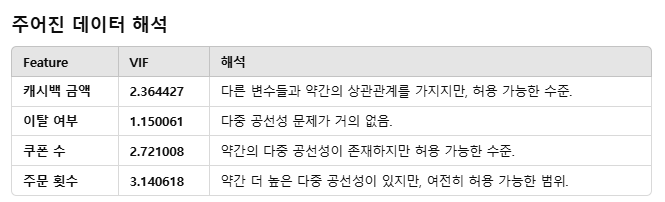

C:\Users\Admin\AppData\Local\Temp\ipykernel_21876\1278247948.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_data.fillna(pca_data.mean(), inplace=True)


<Figure size 1000x600 with 0 Axes>

c:\Users\Admin\miniconda3\envs\project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


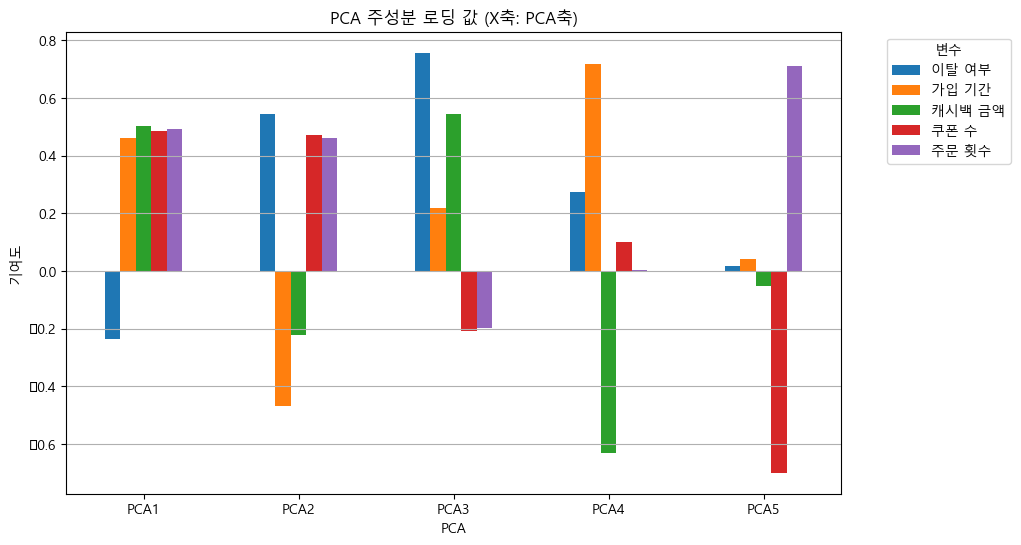

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 수치형 열 이름 정의
numeric_columns = ['이탈 여부', '가입 기간', '캐시백 금액', '쿠폰 수', '주문 횟수']

# PCA를 위한 데이터 준비
pca_data = data[numeric_columns]

# 결측값 처리
pca_data.fillna(pca_data.mean(), inplace=True)

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data)

# PCA 수행
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# PCA 주성분 로딩 값 계산
pca_components = pd.DataFrame(
    pca.components_,
    columns=numeric_columns,
    index=[f'PCA{i+1}' for i in range(len(numeric_columns))]
)

# 그래프 생성: X축을 PCA1~PCA5로 설정
plt.figure(figsize=(10, 6))
pca_components.plot(kind='bar', figsize=(10, 6), legend=True)
plt.title("PCA 주성분 로딩 값 (X축: PCA축)")
plt.xlabel("PCA")
plt.ylabel("기여도")
plt.grid(axis='y')
plt.legend(title="변수", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()


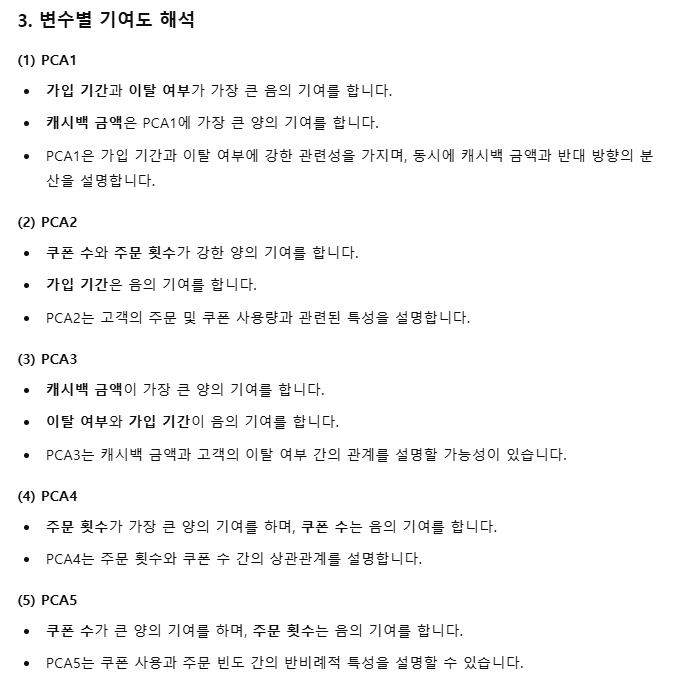

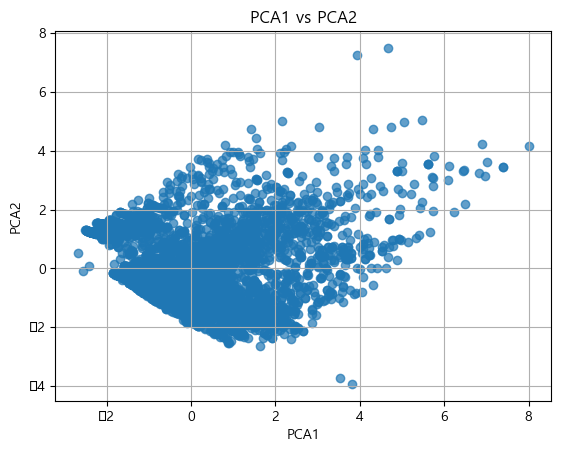

In [34]:
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA1 vs PCA2')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid()
plt.show()

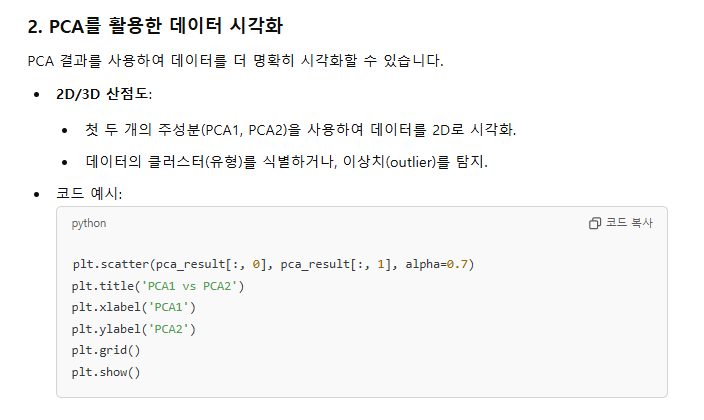